In [1]:
%load_ext autoreload
%autoreload 2
from src.experiments.training_experiments import run_batched_DOE_with_features
from src.models.sae_model import BatchedSAE_Updated
import pandas as pd
from matplotlib import pyplot as plt

#manual seed torch and numpy
import torch
import numpy as np

seed = 1337
torch.manual_seed(seed)
np.random.seed(seed)

In [2]:
results = run_batched_DOE_with_features(model_type=BatchedSAE_Updated, width_factor=16)

In [3]:
# First, let's flatten the structure
flattened_data = []
for sparsity, value_list in results.items():
    for item in value_list:
        # Create a row by combining the sparsity with the inner dictionary
        row = {"sparsity": sparsity}
        row.update(
            {
                "mse": float(item["mse"]),
                "L0": float(item["L0"]),
                "L1 lambda": item["L1 lambda"],
                "weights": item["weights"],
                "biases": item["biases"],
                "features": item["features"],
            }
        )
        flattened_data.append(row)

# Create DataFrame
df = pd.DataFrame(flattened_data)

In [4]:
df

,sparsity,mse,L0,L1 lambda,weights,biases,features
0,5,0.004994,20.076324,0.00002,"[[-0.06803811, 0.009099024, 0.0074871494, -0.0...","[0.0018075213, 0.0022630657, 0.024639409, 0.02...","[[-0.06266938682043928, -0.04369489411120658, ..."
1,5,0.010134,14.472491,0.00003,"[[0.0007771464, -0.028633269, 0.041505173, -0....","[0.0021330388, 0.001339179, 0.024733456, 0.021...","[[-0.06266938682043928, -0.04369489411120658, ..."
2,5,0.016596,9.103828,0.00004,"[[-0.011550931, -0.007209734, -0.060890567, 0....","[0.0005473564, 0.0020973603, 0.023846, 0.02211...","[[-0.06266938682043928, -0.04369489411120658, ..."
3,5,0.021734,4.224788,0.00005,"[[-0.016175676, -0.078252606, -0.093330994, 0....","[0.0013928812, 0.00177523, 0.02510957, 0.02274...","[[-0.06266938682043928, -0.04369489411120658, ..."
4,5,0.028976,1.600624,0.00006,"[[-0.04214317, 0.06366062, -0.00577844, 0.1659...","[0.0022277737, 0.0010494416, 0.025763832, 0.02...","[[-0.06266938682043928, -0.04369489411120658, ..."
5,10,0.014776,45.135050,0.00002,"[[-0.09141453, -0.066153504, 0.023833862, -0.1...","[0.027451847, -0.060334947, 0.044042032, 0.019...","[[-0.12488064619168049, -0.12084640547778075, ..."
6,10,0.021327,17.494293,0.00003,"[[-0.08654617, -0.061218135, 0.054510117, 0.04...","[0.025841512, -0.055418808, 0.045059063, 0.017...","[[-0.12488064619168049, -0.12084640547778075, ..."
7,10,0.028607,9.895852,0.00004,"[[-0.024485422, 0.053928096, 0.09575054, 0.018...","[0.024605887, -0.05310063, 0.045087315, 0.0160...","[[-0.12488064619168049, -0.12084640547778075, ..."
8,10,0.034300,5.765012,0.00005,"[[0.013891636, -0.20076902, 0.21202922, 0.0139...","[0.025298852, -0.052773323, 0.04536086, 0.0161...","[[-0.12488064619168049, -0.12084640547778075, ..."
9,10,0.039544,3.538980,0.00006,"[[0.019965624, -0.0151475025, -0.03506373, 0.0...","[0.025481664, -0.05116003, 0.04802588, 0.01810...","[[-0.12488064619168049, -0.12084640547778075, ..."


In [5]:
len(df["weights"].iloc[27])

2048

Average cosine similarity of matched features: 0.9846


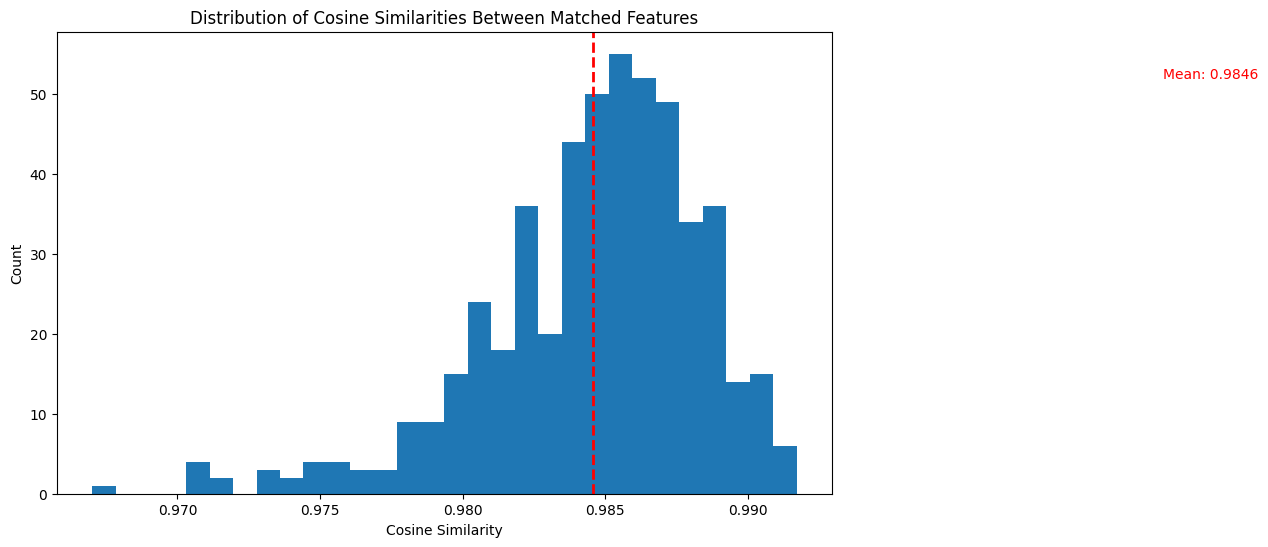

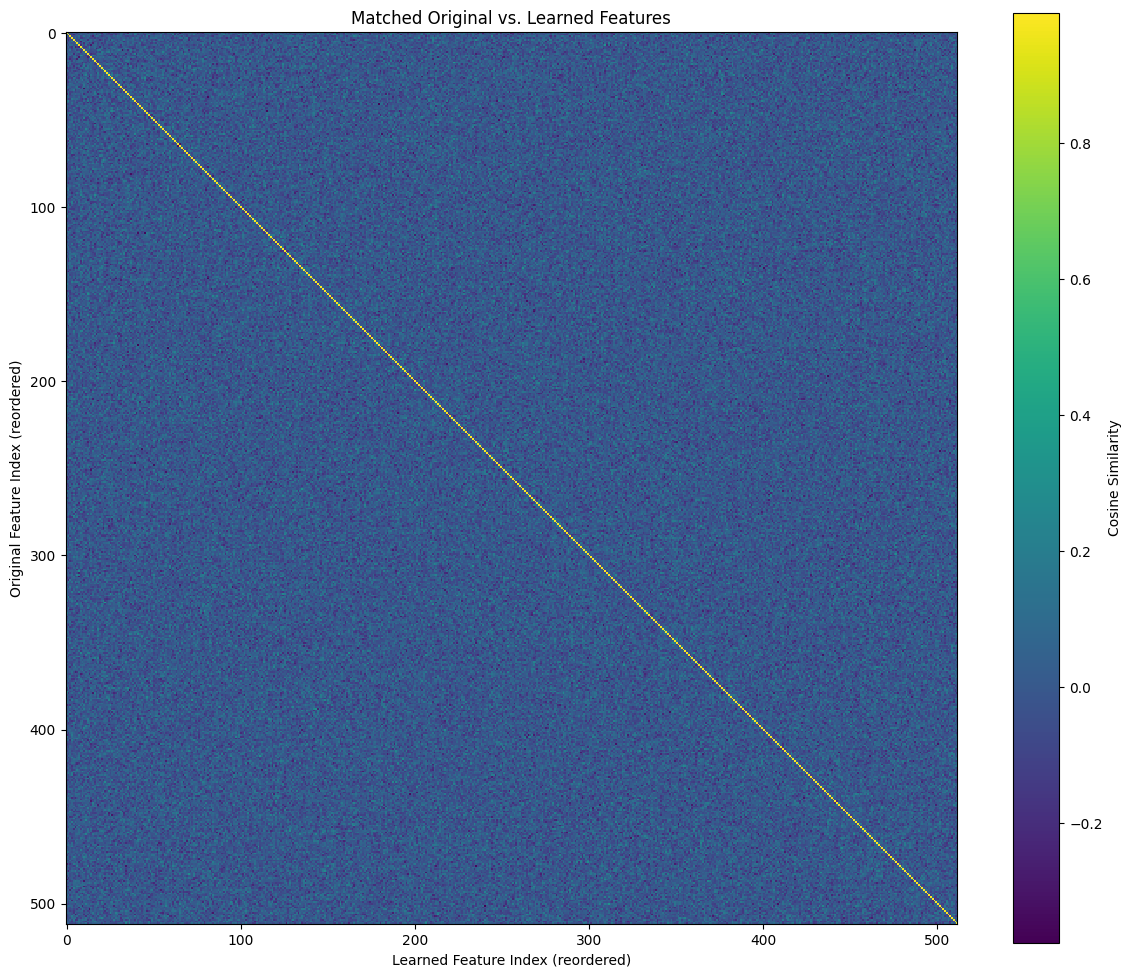

In [10]:
# Starting with:
loc = 4
features = df["features"].iloc[loc]  # Original features - shape 512 x 128
weights = df["weights"].iloc[loc]  # Learned weights (W_out) - shape 512 x 128

# Compute cosine similarity matrix between original features and learned weights
import numpy as np


def cosine_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return np.dot(vec1, vec2) / (norm1 * norm2)


n_features = features.shape[0]  # Should be 512
similarity_matrix = np.zeros((n_features, n_features * 4))

for i in range(n_features):
    for j in range(n_features * 4):
        # Compare original feature i with learned weight row j
        similarity_matrix[i, j] = cosine_similarity(features[i], weights[j])

# Find optimal matching using the Hungarian algorithm
from scipy.optimize import linear_sum_assignment

row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
matches = list(zip(row_ind, col_ind))
match_similarities = [similarity_matrix[i, j] for i, j in matches]
average_similarity = np.mean(match_similarities)

print(f"Average cosine similarity of matched features: {average_similarity:.4f}")

# Visualize the results
import matplotlib.pyplot as plt

# Distribution of similarities
plt.figure(figsize=(10, 6))
plt.hist(match_similarities, bins=30)
plt.title("Distribution of Cosine Similarities Between Matched Features")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.axvline(average_similarity, color="red", linestyle="dashed", linewidth=2)
plt.text(
    average_similarity + 0.02,
    plt.ylim()[1] * 0.9,
    f"Mean: {average_similarity:.4f}",
    color="red",
)
plt.show()

# Visualize the matching with a heatmap of the reordered similarity matrix
plt.figure(figsize=(12, 10))
reordered_matrix = similarity_matrix[row_ind, :][:, col_ind]
plt.imshow(reordered_matrix, cmap="viridis", interpolation="none")
plt.colorbar(label="Cosine Similarity")
plt.title("Matched Original vs. Learned Features")
plt.xlabel("Learned Feature Index (reordered)")
plt.ylabel("Original Feature Index (reordered)")
plt.tight_layout()
plt.show()

In [7]:
vecs = np.ones((2, 100))
vec1 = vecs[0, :]
vec2 = vecs[1, :]

vec1[0] = 0

# normalize
vec1 = vec1 / np.linalg.norm(vec1)
vec2 = vec2 / np.linalg.norm(vec2)

# dot product
dot_product = np.dot(vec1, vec2)

print(dot_product)

0.9949874371066201


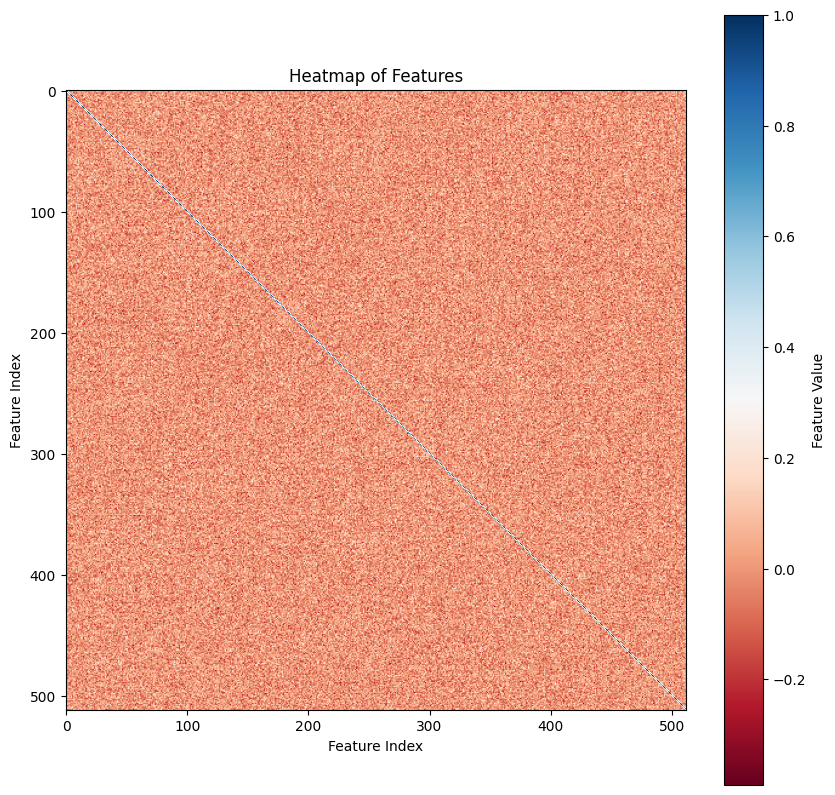

In [8]:
# heatmap of features big plot
plt.figure(figsize=(10, 10))
plt.imshow(features @ features.T, cmap="RdBu")
plt.colorbar(label="Feature Value")
plt.title("Heatmap of Features")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()

In [9]:
# norm of the weight rows
weight_norms = np.linalg.norm(weights, axis=1)
features_norms = np.linalg.norm(features, axis=1)

print(weight_norms)

[0.92542225 0.7969889  0.7605526  ... 0.74150735 0.8554484  0.86532295]
